# **Collaborative Filtering**

Recommender System is a system that seeks to predict or filter preferences according to the user’s choices. Recommender systems are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general.

Like many machine learning techniques, a recommender system makes prediction based on users’ historical behaviors. Specifically, it’s to predict user preference for a set of items based on past experience. To build a recommender system, the most two popular approaches are Content-based and Collaborative Filtering.

Recommender systems produce a list of recommendations in any of the two ways –

1.    **Collaborative filtering**

Collaborative filtering approaches build a model from user’s past behavior (i.e. items purchased or searched by the user) as well as similar decisions made by other users. This model is then used to predict items (or ratings for items) that user may have an interest in.

Collaborative Filtering, on the other hand, doesn’t need anything else except users’ historical preference on a set of items. Because it’s based on historical data, the core assumption here is that the users who have agreed in the past tend to also agree in the future. 

2.    **Content-based filtering**

Content-based filtering approaches uses a series of discrete characteristics of an item in order to recommend additional items with similar properties. Content-based filtering methods are totally based on a description of the item and a profile of the user’s preferences. It recommends items based on user’s past preferences.

Content-based approach requires a good amount of information of items’ own features, rather than using users’ interactions and feedbacks. For example, it can be movie attributes such as genre, year, director, actor etc., or textual content of articles that can extracted by applying Natural Language Processing. 

<hr>

## **User-Based Collaborative Filtering (UB-CF)**

Imagine that we want to recommend a movie to our friend Stanley. We could assume that similar people will have similar taste. Suppose that me and Stanley have seen the same movies, and we rated them all almost identically. But Stanley hasn’t seen ‘The Godfather: Part II’ and I did. If I love that movie, it sounds logical to think that he will too. With that, we have created an artificial rating based on our similarity.

Well, UB-CF uses that logic and recommends items by finding similar users to the active user (to whom we are trying to recommend a movie). A specific application of this is the user-based Nearest Neighbor algorithm. This algorithm needs two tasks:

1. Find the K-nearest neighbors (KNN) to the user a, using a similarity function w to measure the distance between each pair of users:

<img src='https://thesiswhispererhome.files.wordpress.com/2020/05/f568b-1v2xodj5o8mqgy8odrbmafw.png'>

2. Predict the rating that user a will give to all items the k neighbors have consumed but a has not. We Look for the item j with the best predicted rating.

In other words, we are creating a User-Item Matrix, predicting the ratings on items the active user has not see, based on the other similar users. This technique is **memory-based**.

<img src= 'https://cdn-images-1.medium.com/freeze/max/1000/1*FefgqLfxJ6RNJf0YPz4Vgg.jpeg?q=20'>

### **PROS:**

-    Easy to implement.
-    Context independent.
-    Compared to other techniques, such as content-based, it is more accurate.

### **CONS:**

-    Sparsity: The percentage of people who rate items is really low.
-    Scalability: The more K neighbors we consider (under a certain threshold), the better my classification should be. Nevertheless, the more users there are in the system, the greater the cost of finding the nearest K neighbors will be.
-    Cold-start: New users will have no to little information about them to be compared with other users.
-    New item: Just like the last point, new items will lack of ratings to create a solid ranking (More of this on ‘How to sort and rank items’).

### **Two ways to calculate similarity are Pearson Correlation** and **Cosine Similarity**.

<img src = 'https://miro.medium.com/max/1400/1*Xvf2o6kE4VCuueMPikxZ_A.png'>

<img src = 'https://miro.medium.com/max/1400/1*6HISTi8SjbD2VHicoZwKpA.png'>

Basically, the idea is to find the most similar users to your target user (nearest neighbors) and weight their ratings of an item as the prediction of the rating of this item for target user.

Without knowing anything about items and users themselves, we think two users are similar when they give the same item similar ratings . Analogously, for Item-based CF, we say two items are similar when they received similar ratings from a same user. Then, we will make prediction for a target user on an item by calculating weighted average of ratings on most X similar items from this user. One key advantage of Item-based CF is the stability which is that the ratings on a given item will not change significantly overtime, unlike the tastes of human beings.

There are quite a few limitations of this method. It doesn’t handle sparsity well when no one in the neighborhood rated an item that is what you are trying to predict for target user. Also, it’s not computational efficient as the growth of the number of users and products.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [2]:
df = pd.read_csv('file.tsv')
df.head()

,0\t50\t5\t881250949
0,0\t172\t5\t881250949
1,0\t133\t1\t881250949
2,196\t242\t3\t881250949
3,186\t302\t3\t891717742
4,22\t377\t1\t878887116


#### Insert Column Names

In [3]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('file.tsv', sep = '\t', names = column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


#### Insert Movie Titles

In [4]:
movie_titles = pd.read_csv('Movie_Id_Titles.csv')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


#### Merging Data

In [5]:
data = pd.merge(df, movie_titles, on = 'item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


#### Mean Rating 

In [6]:
data.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

#### Count Rating

In [7]:
data.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

#### Creating DF with 'rating' count values

In [8]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


#### Visualizing

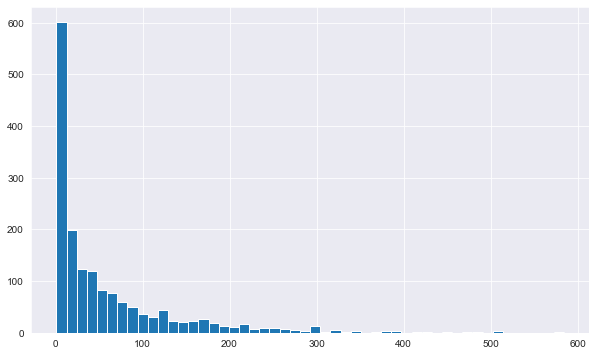

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))

ratings['num of ratings'].hist(bins = 50)

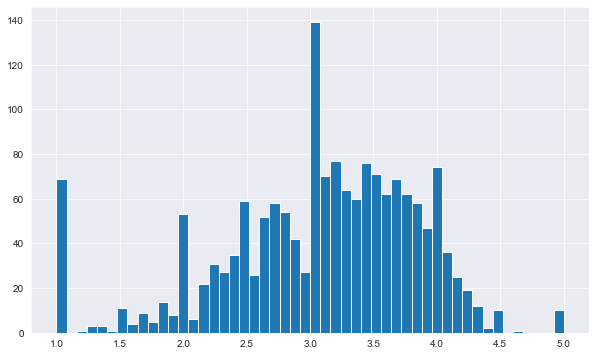

In [10]:
plt.figure(figsize=(10,6))

ratings['rating'].hist(bins = 50)

#### Sort Dataset according to 'num of ratings' column

In [11]:
ratings.sort_values('num of ratings', ascending = False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


#### Recommendation based on 'Movie Rating' correlation

In [12]:
# moviemat = moviematrix
moviemat = data.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# analyzing correlation with similar movies
dalmantians_user_ratings = moviemat['101 Dalmatians (1996)']
youngfrank_user_ratings = moviemat['Young Frankenstein (1974)']

In [14]:
dalmantians_user_ratings.head()

user_id
0    NaN
1    2.0
2    NaN
3    NaN
4    NaN
Name: 101 Dalmatians (1996), dtype: float64

In [15]:
youngfrank_user_ratings.head()

user_id
0    NaN
1    5.0
2    NaN
3    NaN
4    NaN
Name: Young Frankenstein (1974), dtype: float64

In [16]:
# analyzing correlation with similar movies
dalmantians_sim = moviemat.corrwith(dalmantians_user_ratings)
youngfrank_sim = moviemat.corrwith(youngfrank_user_ratings)

In [17]:
corr_dalmantians = pd.DataFrame(dalmantians_sim, columns = ['Correlation'])
corr_dalmantians.dropna(inplace = True)
corr_dalmantians.head()

,Correlation
title,
'Til There Was You (1997),-1.000000
101 Dalmatians (1996),1.000000
12 Angry Men (1957),-0.049890
187 (1997),0.269191
2 Days in the Valley (1996),0.048973


In [18]:
corr_youngfrank = pd.DataFrame(youngfrank_sim, columns = ['Correlation'])
corr_youngfrank.dropna(inplace = True)
corr_youngfrank.head()

,Correlation
title,
1-900 (1994),-0.944911
101 Dalmatians (1996),0.158840
12 Angry Men (1957),0.096546
187 (1997),0.455233
2 Days in the Valley (1996),0.064559


In [19]:
corr_dalmantians.sort_values('Correlation', ascending = False).head(10)
corr_dalmantians = corr_dalmantians.join(ratings['num of ratings'])
corr_dalmantians.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),-1.000000,9
101 Dalmatians (1996),1.000000,109
12 Angry Men (1957),-0.049890,125
187 (1997),0.269191,41
2 Days in the Valley (1996),0.048973,93


In [20]:
corr_dalmantians[corr_dalmantians['num of ratings'] > 100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
101 Dalmatians (1996),1.000000,109
Murder at 1600 (1997),0.663965,218
Miracle on 34th Street (1994),0.609938,101
Being There (1979),0.530438,116
"Remains of the Day, The (1993)",0.514223,150


In [21]:
corr_youngfrank.sort_values('Correlation', ascending = False).head(10)
corr_youngfrank = corr_youngfrank.join(ratings['num of ratings'])
corr_youngfrank.head()

,Correlation,num of ratings
title,,
1-900 (1994),-0.944911,5
101 Dalmatians (1996),0.158840,109
12 Angry Men (1957),0.096546,125
187 (1997),0.455233,41
2 Days in the Valley (1996),0.064559,93


In [22]:
corr_youngfrank[corr_youngfrank['num of ratings'] > 100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Young Frankenstein (1974),1.000000,200
Miracle on 34th Street (1994),0.558768,101
Young Guns (1988),0.510284,101
Welcome to the Dollhouse (1995),0.490108,112
Fly Away Home (1996),0.448428,180
